## Predicting Reliability

## Import Libraries

In [1]:
import pandas as pd                # pandas is a dataframe library
import matplotlib.pyplot as plt    # matplotlib.pyplot plots data
import numpy as np                 # numpy provides N-dim object support

# Do plotting inline instead of in a separate window
%matplotlib inline

## Load and review data

In [2]:
df = pd.read_csv("machine-data.csv") 

In [3]:
df.shape

(209, 11)

In [4]:
df.head(5)

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP,Reliability
0,adviser,32/60,125,256,6000,256,16,128,198,199,True
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253,True
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253,True
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253,True
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132,True


In [5]:
df.head(5)

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP,Reliability
0,adviser,32/60,125,256,6000,256,16,128,198,199,True
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253,True
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253,True
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253,True
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132,True


In [6]:
df.tail(5)

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP,Reliability
204,sperry,80/8,124,1000,8000,0,1,8,42,37,False
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50,False
206,sratus,32,125,2000,8000,0,2,14,52,41,False
207,wang,vs-100,480,512,8000,32,0,0,67,47,False
208,wang,vs-90,480,1000,4000,0,0,0,45,25,False


### Definition of Features

Attribute Information:
   1. vendor name: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
   2. Model Name: many unique symbols
   3. MYCT: machine cycle time in nanoseconds (integer)
   4. MMIN: minimum main memory in kilobytes (integer)
   5. MMAX: maximum main memory in kilobytes (integer)
   6. CACH: cache memory in kilobytes (integer)
   7. CHMIN: minimum channels in units (integer)
   8. CHMAX: maximum channels in units (integer)
   9. PRP: published relative performance (integer)
   10. ERP: estimated relative performance from the original article (integer)
  

### Checking for null values

In [7]:
df.isnull().values.any()

False

### Plot Correlation

In [8]:
def plot_corr(df, size=10):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        
    Displays:
        matrix of correlation between columns. Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------> 1
                                                Expect a darkred line running from top left to bottom right
    """
    
    corr = df.corr()   # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)   # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)   # draw y tick marks
    

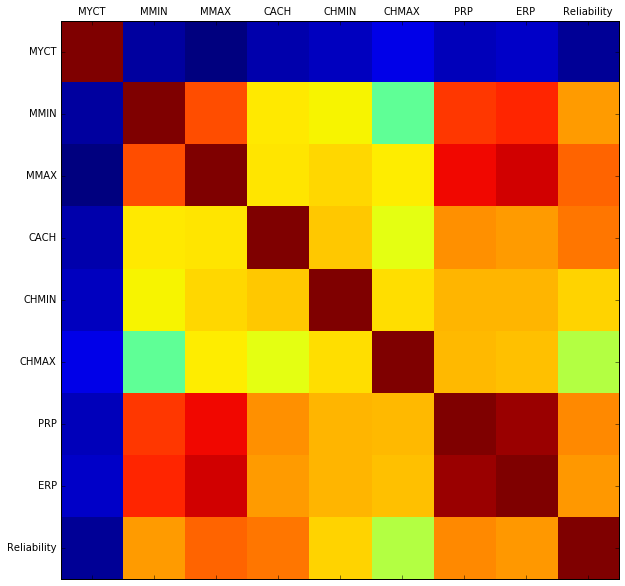

In [9]:
plot_corr(df)

In [10]:
df.corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP,Reliability
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396,-0.350576
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292,0.649018
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202,0.730436
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620,0.701431
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580,0.564404
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156,0.406151
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472,0.673451
ERP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000,0.650478
Reliability,-0.350576,0.649018,0.730436,0.701431,0.564404,0.406151,0.673451,0.650478,1.000000


In [11]:
df.head() # This is to check which column has the most similar correlation

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP,Reliability
0,adviser,32/60,125,256,6000,256,16,128,198,199,True
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253,True
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253,True
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253,True
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132,True


In [12]:
# del df['name of column']   # This is to delete the column with most similar correlation

## Molding Data

### Checking Data Types

#### Change True to 1, False to 0

In [13]:
# Maping Dictionary

reliability_map = {True : 1, False : 0}

In [14]:
# Using pandas data frame map method to change true-false to 1-0 by iterating through all of the data

df['Reliability'] = df['Reliability'].map(reliability_map)

In [15]:
df.head(6)

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP,Reliability
0,adviser,32/60,125,256,6000,256,16,128,198,199,1
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253,1
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253,1
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253,1
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132,1
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290,1


## Check True/False Ratio

In [16]:
num_true = len(df.loc[df['Reliability'] == True])   # How many times Reliability is True
num_false = len(df.loc[df['Reliability'] == False])   # How many times Reliability is False

print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Number of True cases: 53 (25.36%)
Number of False cases: 156 (74.64%)


## Splitting the Data

70% for Training, 30% for Testing

In [17]:
# Now using scikit learn split method to split data into corresponding sets
# using scikit learn train method to train the corresponding data sets

from sklearn.cross_validation import train_test_split

featured_col_names = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
predicted_class_names = ['Reliability']

X = df[featured_col_names].values     # predictor featured columns (8 x m)
y = df[predicted_class_names].values   # predicted class (1 = true, 0 = false) column (1 X m)

split_test_size = 0.30                # test_size = 30%

# These above data frames and test split size of 30% are passed to the train_test_split function below:
# Any value can be used to set random state. This is done to return same output after running the tests multiple times.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42) 

We check to ensure we have the desired split of the data: 70% training data and 30% test data

In [18]:
print("{0:0.2f}% in training set.".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set.".format((len(X_test)/len(df.index)) * 100))

69.86% in training set.
30.14% in test set.


#### Verifying predicted value was split correctly

In [19]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['Reliability'] == 1]), (len(df.loc[df['Reliability'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Reliability'] == 0]), (len(df.loc[df['Reliability'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True : 53 (25.36%)
Original False : 156 (74.64%)

Training True : 34 (23.29%)
Training False : 112 (76.71%)

Test True : 19 (30.16%)
Test False : 44 (69.84%)


### Post-split Data Preparation

#### Hidden Missing Values

In [20]:
df.head()

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP,Reliability
0,adviser,32/60,125,256,6000,256,16,128,198,199,1
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253,1
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253,1
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253,1
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132,1


Find out how many rows have missing 0 values

In [21]:
print(" # rows in dataframe {0}".format(len(df)))
print(" # rows missing MYCT : {0}".format(len(df.loc[df['MYCT'] == 0])))
print(" # rows missing MMIN : {0}".format(len(df.loc[df['MMIN'] == 0])))
print(" # rows missing MMAX : {0}".format(len(df.loc[df['MMAX'] == 0])))
print(" # rows missing CACH : {0}".format(len(df.loc[df['CACH'] == 0])))
print(" # rows missing CHMIN : {0}".format(len(df.loc[df['CHMIN'] == 0])))
print(" # rows missing CHMAX : {0}".format(len(df.loc[df['CHMAX'] == 0])))
print(" # rows missing PRP : {0}".format(len(df.loc[df['PRP'] == 0])))
print(" # rows missing ERP : {0}".format(len(df.loc[df['ERP'] == 0])))

 # rows in dataframe 209
 # rows missing MYCT : 0
 # rows missing MMIN : 0
 # rows missing MMAX : 0
 # rows missing CACH : 69
 # rows missing CHMIN : 5
 # rows missing CHMAX : 5
 # rows missing PRP : 0
 # rows missing ERP : 0


### Impute with the Mean

In [22]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill_0 = Imputer(missing_values = 0, strategy = "mean", axis = 0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test) 

## Training Initial Algorithm - Naive Bayes:

In [23]:
from sklearn.naive_bayes import GaussianNB

# Create Gaussian Naive Bayes Model Object and Train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

### Performance on Training Data

In [24]:
# Predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# Import the Performance Metrics Library (To see accuracy)
from sklearn import metrics

# Accuracy
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.9658



### Performance on Testing Data

In [25]:
# Predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# Training Metrics
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.9524


#### Metrics

In [26]:
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[19  0]
 [ 3 41]]

Classification Report
             precision    recall  f1-score   support

          1       0.86      1.00      0.93        19
          0       1.00      0.93      0.96        44

avg / total       0.96      0.95      0.95        63



Clockwise from Top Left in Confusion Matrix:True Positive (TP), False Positive (FP), True Negative (TN) and False Negative (FN).

Recall = TP/(TP + FN)

Precision = TP/(TP + FP)

## Random Forest Algorithm:

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)   # Create random Forest Object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predict Training Data

In [28]:
rf_predict_train = rf_model.predict(X_train)

# Training Metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 1.0000


### Predicting Test Data

In [29]:
rf_predict_test = rf_model.predict(X_test)

# Training Metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.9841


#### Metrics

In [30]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[19  0]
 [ 1 43]]

Classification Report
             precision    recall  f1-score   support

          1       0.95      1.00      0.97        19
          0       1.00      0.98      0.99        44

avg / total       0.98      0.98      0.98        63



#### Here we can find that the Training Data Metrics is almost similar to Test Data Metrics. In case, there would have been a large difference in between the two, we had to fix the OVERFIT (Training Data more accurate than Test Data) using ***Regularization Hyperparameter AND/OR Cross Validation***. This is called Bias-Variance Tradeoff.


### Logistics Regression Algorithm:

In [31]:
from sklearn.linear_model import LogisticRegression

# In the constructor, we set Regularization Hyperparameter, C to 0.7 as starting point.
lr_model = LogisticRegression(C = 0.7, random_state = 42)
lr_model.fit(X_train, y_train.ravel())   # Train Algo
lr_predict_test = lr_model.predict(X_test)   # Test Algo

# Training Metrics
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("")

print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_predict_test, labels = [1, 0]))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels = [1, 0]))

Accuracy: 1.0000

Confusion Matrix
[[19  0]
 [ 0 44]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        19
          0       1.00      1.00      1.00        44

avg / total       1.00      1.00      1.00        63



Here we have achieved a perfect recall value of 1.00. But if we failed to achieve it, we can
** SET REGULARIZATION PARAMETER**

1st Max value of 1.000 occured at C = 0.600


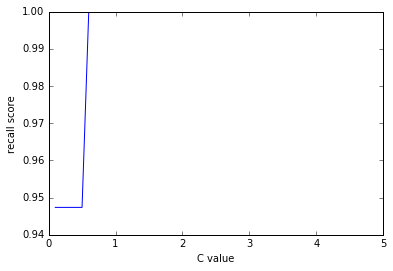

In [32]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, random_state = 42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st Max value of {0:.3f} occured at C = {1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

1st Max value of 1.000 occured at C = 1.100


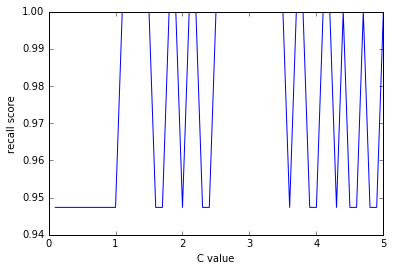

In [33]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, class_weight = "balanced", random_state = 42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st Max value of {0:.3f} occured at C = {1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [35]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight = "balanced", C = best_score_C_val, random_state = 42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# Training Metrics
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("")

print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_predict_test, labels = [1, 0]))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels = [1, 0]))

print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.9841

Confusion Matrix
[[19  0]
 [ 1 43]]

Classification Report
             precision    recall  f1-score   support

          1       0.95      1.00      0.97        19
          0       1.00      0.98      0.99        44

avg / total       0.98      0.98      0.98        63

1.0


### LogisticRegressionCV

In [36]:
from sklearn.linear_model import LogisticRegressionCV
# n_jobs : This is used because as this process is a CPU Intensive Process, we ask to use all the cores of the CPU by setting it to -1
# We set number of folds, cv to 10
# Cs is the number of times the best value is to be deduced for each fold
lr_cv_model = LogisticRegressionCV(n_jobs = -1, random_state = 42, Cs = 3, cv = 10, refit = True, class_weight = "balanced")
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### Predict on Test Data

In [37]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# Training Metrics
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print("")

print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels = [1, 0]))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels = [1, 0]))

print(metrics.recall_score(y_test, lr_cv_predict_test))

Accuracy: 0.9683

Confusion Matrix
[[18  1]
 [ 1 43]]

Classification Report
             precision    recall  f1-score   support

          1       0.95      0.95      0.95        19
          0       0.98      0.98      0.98        44

avg / total       0.97      0.97      0.97        63

0.947368421053
